In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re
import string

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
Bitcoins = pd.read_csv('/content/drive/My Drive/5040/Bitcoin_tweets.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_btc = Bitcoins.sample(n=30000)
#data_btc = Bitcoins.copy()

In [ ]:
#data_copy = data_btc.copy()

In [ ]:
data_btc.columns = ['name','location','description','create','followers','friends','favorites','verified','date','text','tag','source','retweet']
btc_df = data_btc.drop(['name', 'location', 'description', 'create', 'followers', 'friends', 'favorites', 'verified', 'tag', 'source', 'retweet'],axis=1)

In [ ]:
! pip install vaderSentiment

In [ ]:
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

In [ ]:
# clean df 
#clean_data = btc_df.sample(n = 30000)
btc_df = btc_df.sort_values(by = 'date')
btc_df.reset_index(inplace=True)
for i,s in enumerate(tqdm(btc_df['text'],position=0, leave=True)):
    text = str(btc_df.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    btc_df.loc[i, 'text'] = text 

100%|██████████| 30000/30000 [01:15<00:00, 395.79it/s]


In [ ]:
btc_df.head()

,index,date,text
0,21519,2021-02-05 10:53:49,Bitcoin and ETH both have bullish setups for a...
1,21342,2021-02-05 12:38:28,Earn Cashback on every purchase you make! Paid...
2,21184,2021-02-05 13:46:45,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...
3,21141,2021-02-05 14:02:30,Several industrial applications will come on t...
4,21106,2021-02-05 14:14:06,Right here w/ ! /DKvEi2Ayc0\nReferral Code: 71...


In [ ]:
analyzer = SentimentIntensityAnalyzer()
score = []
for i,s in enumerate(tqdm(btc_df['text'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    score.append(vs['compound'])
btc_df['score'] = score
btc_df.head(2)

100%|██████████| 30000/30000 [00:08<00:00, 3638.24it/s]


,index,date,text,score
0,21519,2021-02-05 10:53:49,Bitcoin and ETH both have bullish setups for a...,0.6249
1,21342,2021-02-05 12:38:28,Earn Cashback on every purchase you make! Paid...,0.0000


In [ ]:
btc_df[['polarity', 'subjectivity']] = btc_df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [ ]:
useful = ['date','text','score','subjectivity']
bitcoin_final = btc_df[useful]

# Sentiment analysis

## Data cleaning

In [ ]:
# make a deep copy of bitcoin dataframe
bitcoin_final_copy = bitcoin_final.copy(deep=True)
bitcoin_final_copy.head()

,date,text,score,subjectivity
0,2021-02-05 10:53:49,Bitcoin and ETH both have bullish setups for a...,0.6249,0.416667
1,2021-02-05 12:38:28,Earn Cashback on every purchase you make! Paid...,0.0000,0.000000
2,2021-02-05 13:46:45,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,-0.2023,0.000000
3,2021-02-05 14:02:30,Several industrial applications will come on t...,0.0000,0.000000
4,2021-02-05 14:14:06,Right here w/ ! /DKvEi2Ayc0\nReferral Code: 71...,0.0000,0.535714


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
stopword = list(stopword)

def remove_stopword(x):
    return [y for y in x if y not in stopword]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# clean text and remove stopword
bitcoin_final_copy['text'] = bitcoin_final_copy['text'].apply(lambda x:clean_text(x))
bitcoin_final_copy['text'] = bitcoin_final_copy['text'].apply(lambda x:str(x).split())
bitcoin_final_copy['text'] = bitcoin_final_copy['text'].apply(lambda x:remove_stopword(x))

## Split dataframe based on sentiments

In [ ]:
# Three dataframe containing positive, negative, neutral sentiment respectively
Positive_sent = bitcoin_final_copy[bitcoin_final_copy['score'] > 0]
Negative_sent = bitcoin_final_copy[bitcoin_final_copy['score'] == 0]
Neutral_sent = bitcoin_final_copy[bitcoin_final_copy['score'] < 0]

In [ ]:
# check positive sentiment dataframe
Positive_sent

,date,text,score,subjectivity
0,2021-02-05 10:53:49,"[bitcoin, eth, bullish, setups, move, higher, ...",0.6249,0.416667
5,2021-02-05 14:30:09,"[favorite, crypto, trade, let, us, know, comme...",0.5093,1.000000
6,2021-02-05 14:50:06,"[💎, daily, monthly, earnings, rate⏰, package, ...",0.2500,0.000000
8,2021-02-05 15:19:30,"[wow, ethereum, getting, huge, pump, dont, mis...",0.9356,0.550000
14,2021-02-05 19:04:08,"[answer, learning, blockchain, technology, goo...",0.4404,0.283333
...,...,...,...,...
29986,2022-03-19 23:05:12,"[day, go😎🔥🚀, minting, mar, gmtdogecola, nft, m...",0.1531,0.447222
29990,2022-03-19 23:20:21,"[number, whale, transactions, ethereum, increa...",0.2960,0.216667
29992,2022-03-19 23:28:26,"[dont, miss, provide, latest, market, case, st...",0.1867,0.900000
29995,2022-03-19 23:45:07,"[📈analysis, march, 📈the, current, price, btc, ...",0.2023,0.575000


In [ ]:
from collections import Counter

In [ ]:
# add one column 'sentiment' based on score: positive if score>0, neutral if score=0, negative if score<0
bitcoin_final_copy['sentiment'] = bitcoin_final_copy['score'].apply(lambda x: "positive" if x>0 else ("neutral" if x==0 else "negative"))

In [ ]:
# check df with added column
bitcoin_final_copy

,date,text,score,subjectivity,sentiment
0,2021-02-05 10:53:49,"[bitcoin, eth, bullish, setups, move, higher, ...",0.6249,0.416667,positive
1,2021-02-05 12:38:28,"[earn, cashback, every, purchase, make, paid, ...",0.0000,0.000000,neutral
2,2021-02-05 13:46:45,"[🔄, prices, update, usd, hourbtc, eth, xrp, …]",-0.2023,0.000000,negative
3,2021-02-05 14:02:30,"[several, industrial, applications, come, main...",0.0000,0.000000,neutral
4,2021-02-05 14:14:06,"[right, w, code, …]",0.0000,0.535714,neutral
...,...,...,...,...,...
29995,2022-03-19 23:45:07,"[📈analysis, march, 📈the, current, price, btc, ...",0.2023,0.575000,positive
29996,2022-03-19 23:47:47,"[pump, gtc, 🔥gtc, hit, targets, made, max, gai...",0.3971,0.425000,positive
29997,2022-03-19 23:51:54,"[comical, bitcoin]",0.0000,1.000000,neutral
29998,NaN,[nan],0.0000,0.000000,neutral


## Frequency of sentiments

In [ ]:
temp = bitcoin_final_copy.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
2,positive,16405
1,neutral,8982
0,negative,4613


## Unique words frequency based on sentiments

In [ ]:
raw_text = [word for word_list in bitcoin_final_copy['text'] for word in word_list]

In [ ]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in bitcoin_final_copy[bitcoin_final_copy.sentiment != sentiment]['text']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in bitcoin_final_copy[bitcoin_final_copy.sentiment == sentiment]['text']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

### Positive sentiment

In [ ]:
# Top 20 unique postive tweets frequency
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,hopefully,328
1,excellent,250
2,location,197
3,coinhuntworld,194
4,stakes,172
5,projector,163
6,attractions,140
7,hecochain,126
8,⚡unlock,115
9,exciting,110


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im", 'count', 'words'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

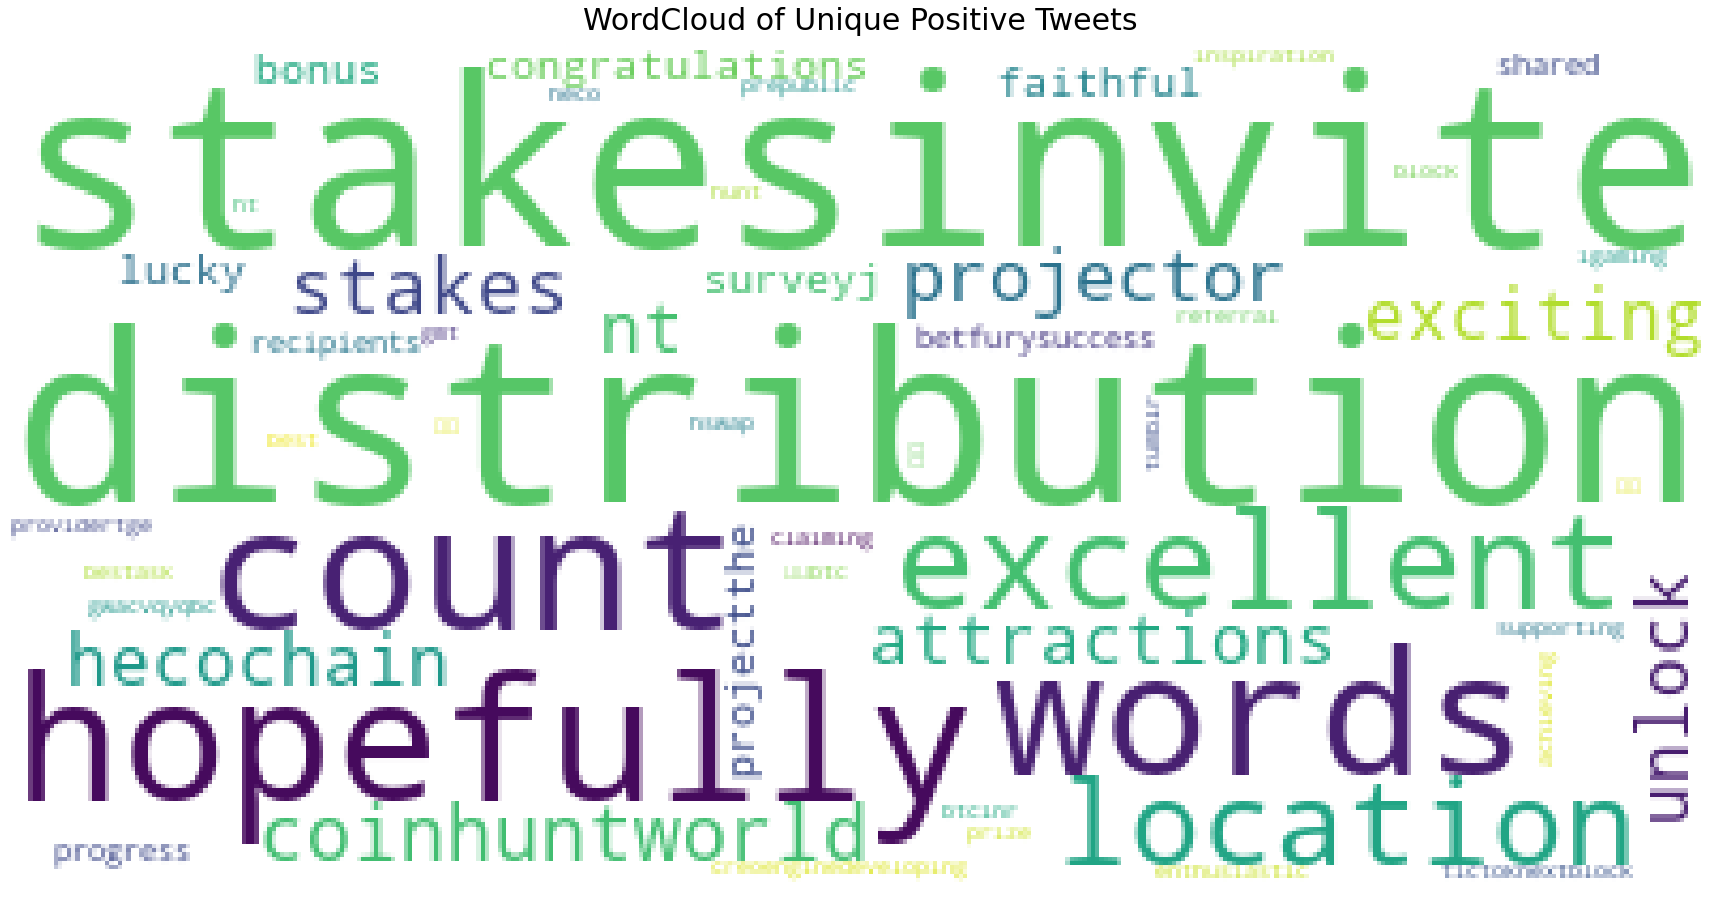

In [ ]:
# 50 unique positive words wordcloud
Unique_Positive_50= words_unique('positive', 50, raw_text)
plot_wordcloud(Unique_Positive_50,color='white',max_font_size=80,title_size=30,title="WordCloud of Unique Positive Tweets")

### Negative sentiment

In [ ]:
# Top 20 unique negative tweets frequency
Unique_Negative= words_unique('negative', 20, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 20 unique words in Negative Tweets are:


,words,count
0,btcusdcurrent,64
1,realmoney,59
2,hourbtc,40
3,rb,40
4,againit,30
5,incomeso,22
6,💰💸thank,22
7,royalbnb,20
8,lroyalbnbarmy,20
9,🔥🤩royal,20


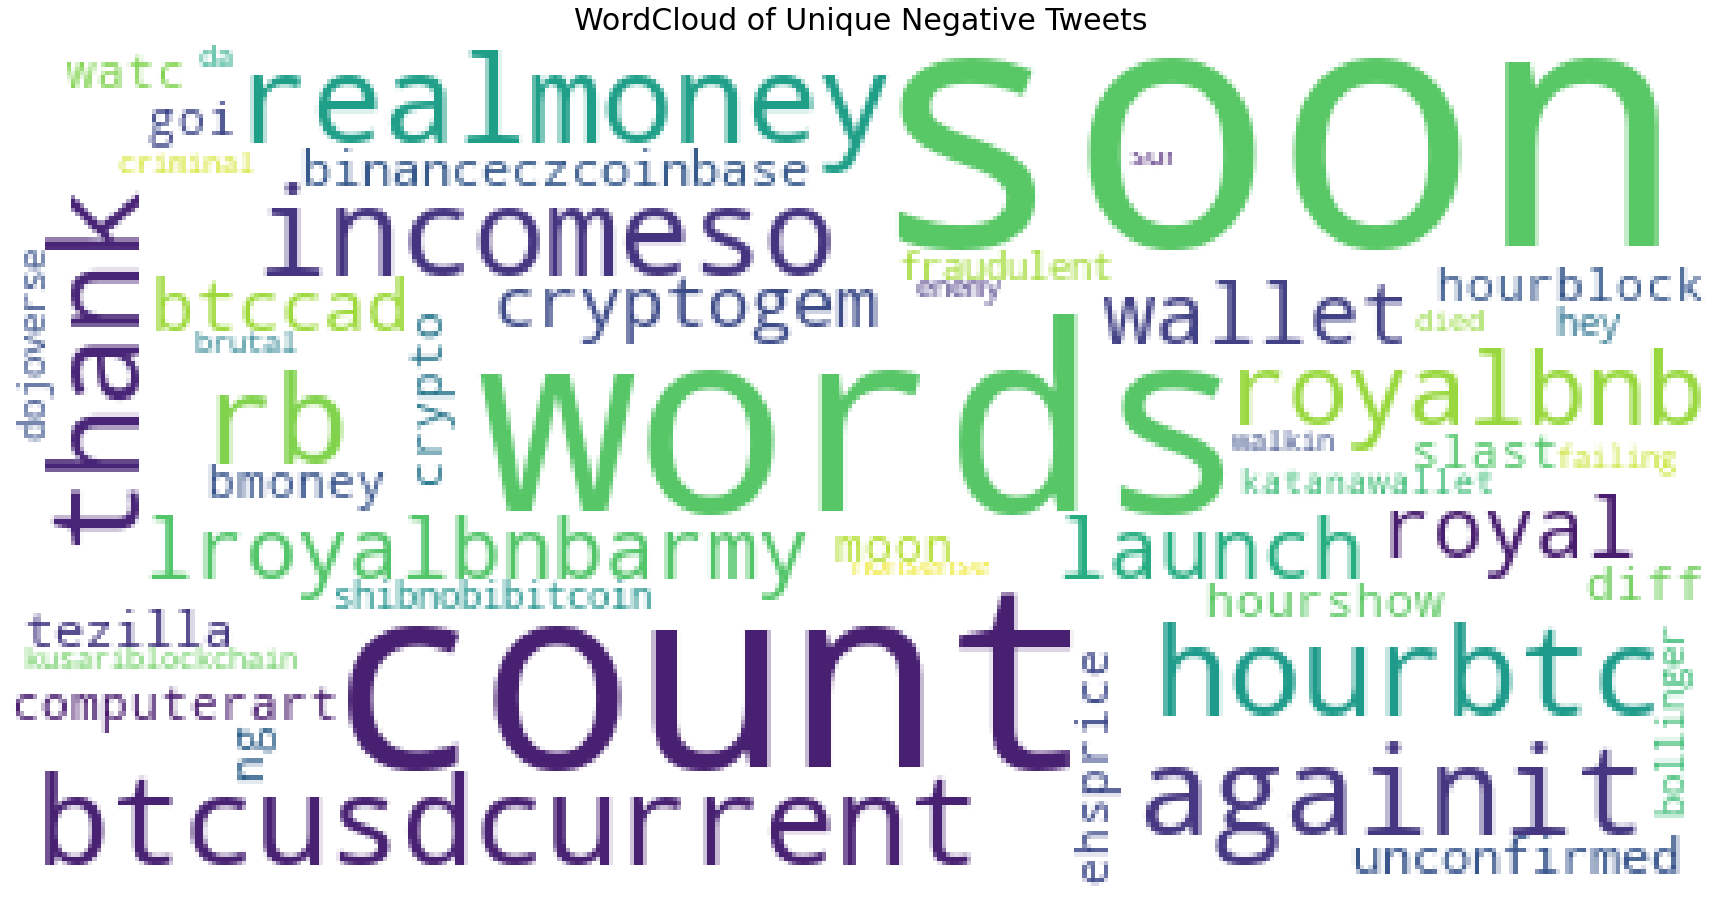

In [ ]:
# 50 unique negative words wordcloud
Unique_Negative_50= words_unique('negative', 50, raw_text)
plot_wordcloud(Unique_Negative_50,color='white',max_font_size=80,title_size=30,title="WordCloud of Unique Negative Tweets")

### Neutral sentiment

In [ ]:
# Top 20 unique neutral tweets frequency
Unique_Neutral= words_unique('neutral', 20, raw_text)
print("The top 20 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Blues')

The top 20 unique words in Neutral Tweets are:


,words,count
0,➽,245
1,⇨,232
2,➦,203
3,➨,173
4,usd₿bitcoin,138
5,🚨🐋,128
6,naks,105
7,🔻🔻🔻entry,104
8,➷crypto,64
9,watchinwhales,61


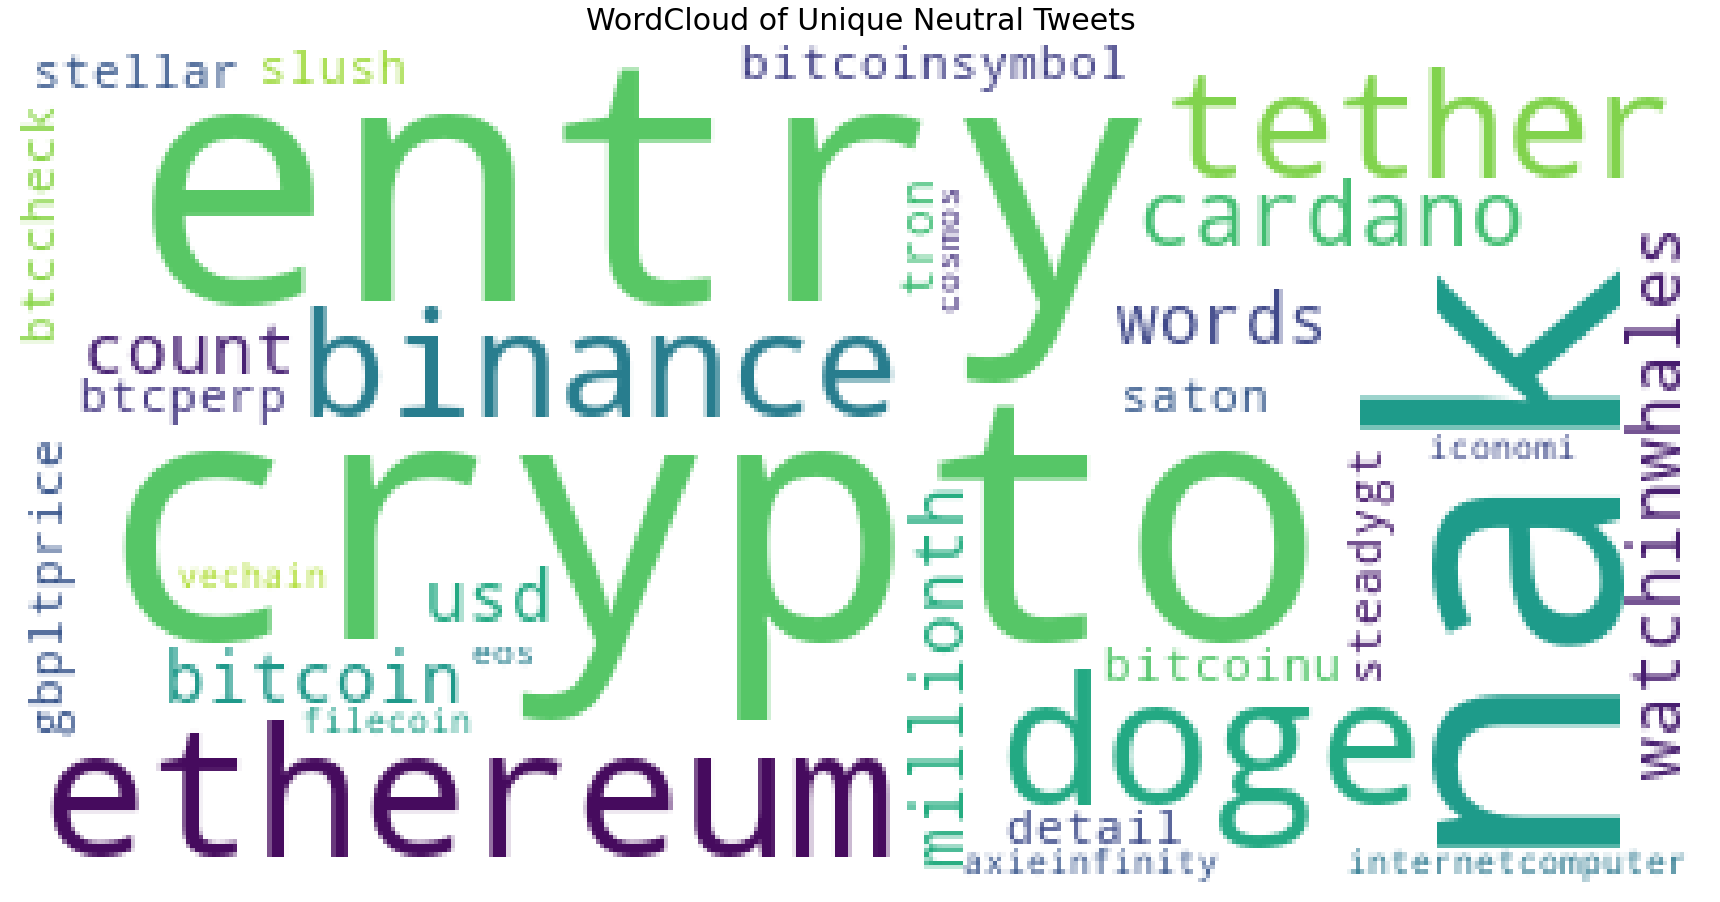

In [ ]:
# 50 unique neutral words wordcloud
Unique_Neutral_50= words_unique('neutral', 50, raw_text)
plot_wordcloud(Unique_Neutral_50,color='white',max_font_size=80,title_size=30,title="WordCloud of Unique Neutral Tweets")

# Combine sentiment and bitcoin price

In [ ]:
bitcoin_final.head()

,date,text,score,subjectivity
0,2021-02-05 10:52:07,"5⃣ Blockchain 50 2021 by , , ⬇️\n\ncryptocur...",0.0000,0.0
1,2021-02-05 10:54:52,$PERL 0.06.\nI have insisted that since 0.02 i...,0.2732,0.0
2,2021-02-05 11:14:26,PENN ASIA IS DEVELOPING A DIGITAL ASSET CALLED...,0.4995,0.0
3,2021-02-05 11:28:46,🔄 Prices update in $USDT (1 hour):\n\n$BTC - 3...,-0.2023,0.0
4,2021-02-05 11:40:23,Watch CSGO Live Streaming \nRERUN: Team Vitali...,0.3818,0.2


In [ ]:
bitcoin_final['date'] = pd.to_datetime(bitcoin_final['date'])
bitcoin_final['DateTime'] = bitcoin_final['date'].dt.floor('d')
tweets = bitcoin_final.groupby(pd.Grouper(key='date',freq='D')).size().reset_index(name='tweet_vol')
tweets.index = pd.to_datetime(tweets.index)
tweets=tweets.set_index('date')
bitcoin_final.index = pd.to_datetime(bitcoin_final.index)
tweets['tweet_vol'] = tweets['tweet_vol'].astype(float)
text_df = bitcoin_final.groupby('DateTime').agg(lambda x: x.mean())
text_df['Tweet_vol'] = tweets['tweet_vol']
text_df = text_df.drop(text_df.index[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns wh

In [ ]:
text_df.head()

,date,score,subjectivity,Tweet_vol
DateTime,,,,
2021-02-06,2021-02-06 13:12:04.325396480,0.123400,0.349556,126.0
2021-02-07,2021-02-07 12:37:25.695652352,0.171644,0.327650,115.0
2021-02-08,2021-02-08 14:50:57.586956544,0.167346,0.272369,230.0
2021-02-09,2021-02-09 11:39:43.534482688,0.167979,0.253796,174.0
2021-02-10,2021-02-10 12:22:22.486486528,0.146256,0.238102,148.0


In [ ]:
df = text_df.sort_values(by='date',ascending=True)
df.head(10)

,date,score,subjectivity,Tweet_vol
DateTime,,,,
2021-02-06,2021-02-06 13:12:04.325396480,0.123400,0.349556,126.0
2021-02-07,2021-02-07 12:37:25.695652352,0.171644,0.327650,115.0
2021-02-08,2021-02-08 14:50:57.586956544,0.167346,0.272369,230.0
2021-02-09,2021-02-09 11:39:43.534482688,0.167979,0.253796,174.0
2021-02-10,2021-02-10 12:22:22.486486528,0.146256,0.238102,148.0
2021-02-13,2021-02-13 16:54:01.505494784,0.205138,0.285795,91.0
2021-02-14,2021-02-14 13:44:35.900709120,0.360133,0.386757,141.0
2021-02-15,2021-02-15 10:38:56.283333376,0.390134,0.437366,180.0
2021-02-18,2021-02-18 16:15:03.459459328,0.164808,0.249486,74.0


In [ ]:
df = df.drop(['date'], axis=1)

In [ ]:
Bitcoin_price = pd.read_csv('/content/drive/My Drive/5040/BTC.csv')

In [ ]:
Bitcoin_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [ ]:
Bitcoin_price.Date = pd.to_datetime(Bitcoin_price.Date)
Bitcoin_price.index = Bitcoin_price['Date']

In [ ]:
Bitcoin_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-01-01,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
2021-01-05,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [ ]:
all_df = pd.merge(df,Bitcoin_price, how='inner',left_index=True, right_index=True)

In [ ]:
all_df.head()

,score,subjectivity,Tweet_vol,Date,Open,High,Low,Close,Adj Close,Volume
2021-02-06,0.123400,0.349556,126.0,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,0.171644,0.327650,115.0,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
2021-02-08,0.167346,0.272369,230.0,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
2021-02-09,0.167979,0.253796,174.0,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886
2021-02-10,0.146256,0.238102,148.0,2021-02-10,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2021-02-06 to 2022-03-19
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   score         126 non-null    float64       
 1   subjectivity  126 non-null    float64       
 2   Tweet_vol     126 non-null    float64       
 3   Date          126 non-null    datetime64[ns]
 4   Open          126 non-null    float64       
 5   High          126 non-null    float64       
 6   Low           126 non-null    float64       
 7   Close         126 non-null    float64       
 8   Adj Close     126 non-null    float64       
 9   Volume        126 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 10.8 KB


In [ ]:
all_df['Volume'] = all_df['Volume'].astype(float)

In [ ]:
from pathlib import Path
filepath = Path('/content/drive/MyDrive/5040/bitcoin10w.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
all_df.to_csv(filepath)

## Plot correlation

In [ ]:
# sentiment analysis 
clean_data = all_df.drop_duplicates()
tweets = clean_data.copy()
tweets['Date'] = pd.to_datetime(tweets['Date'],utc=True)
tweets.Date = tweets.Date.dt.tz_localize(None)
tweets.index = tweets['Date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1d').sum()

crypto_usd = Bitcoin_price.copy()
crypto_usd['Date'] = pd.to_datetime(crypto_usd['Date'], unit='s')
crypto_usd.index = crypto_usd['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
crypto_usd_grouped = crypto_usd.resample('D')['Close'].mean()

In [ ]:
def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation. 
    Parameters
    —------—
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    —------—
    crosscorr : float
    """
    return datax.corrwith(datay.shift(lag), method=method)['score']
# xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, m ='pearson' ) for i in range(-20,20)]
# tweets_grouped.corrwith(crypto_usd_grouped,method='pearson')

In [ ]:
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

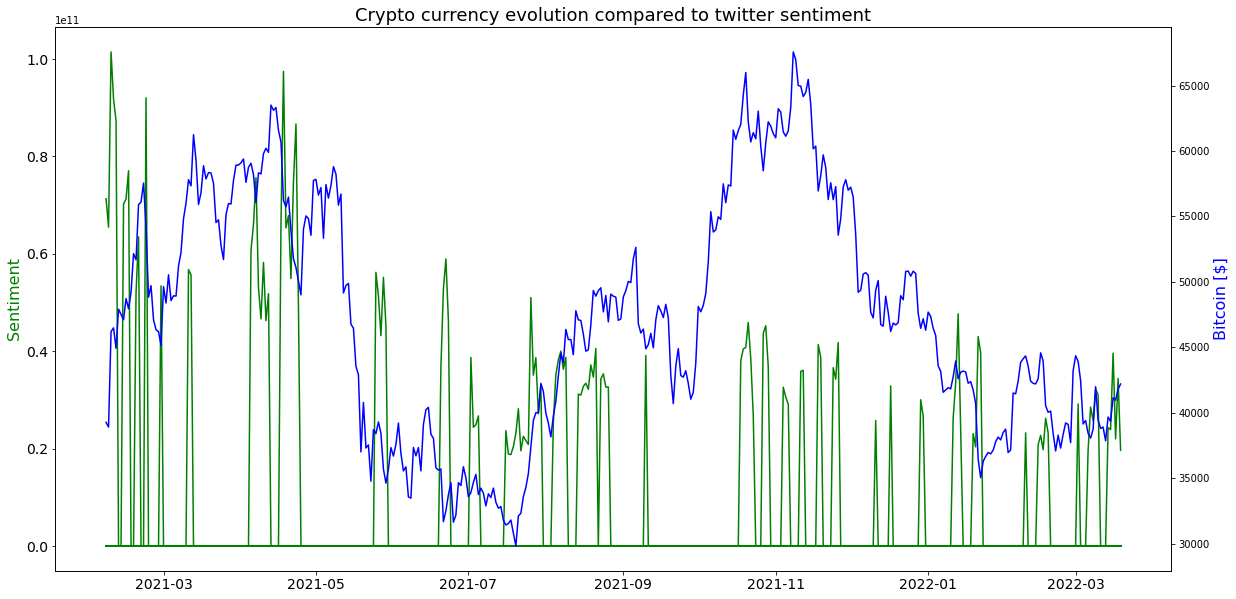

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
plt.show()

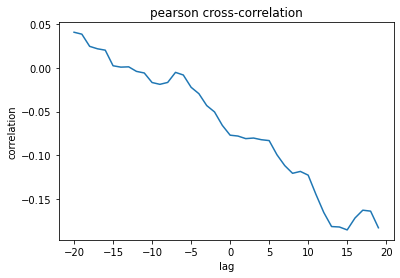

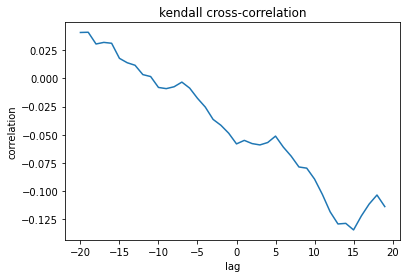

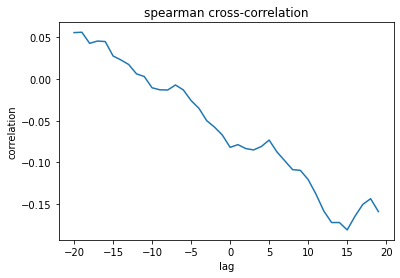

In [ ]:
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

In [ ]:
tweets_group = tweets_grouped['score']

In [ ]:
crypto_usd_grouped

Date
2021-02-06    39266.011719
2021-02-07    38903.441406
2021-02-08    46196.464844
2021-02-09    46481.105469
2021-02-10    44918.183594
                  ...     
2022-03-15    39338.785156
2022-03-16    41143.929688
2022-03-17    40951.378906
2022-03-18    41801.156250
2022-03-19    42190.652344
Freq: D, Name: Close, Length: 407, dtype: float64

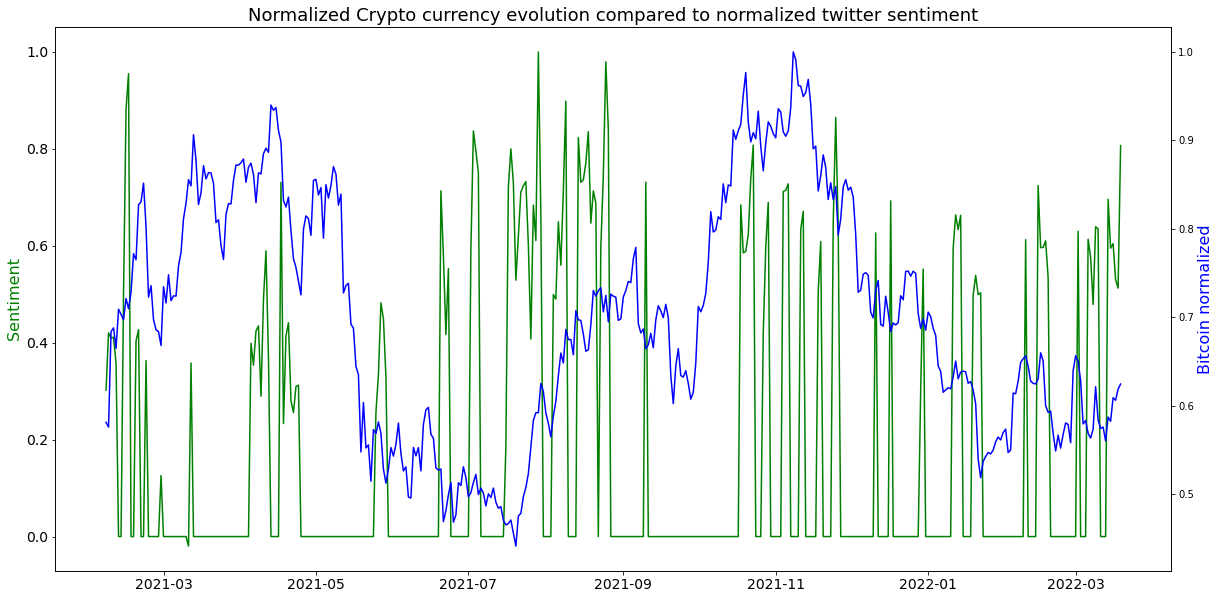

In [ ]:
tweets_group = tweets_group / max(tweets_group.max(), abs(tweets_group.min()))
crypto_usd_grouped = crypto_usd_grouped / max(crypto_usd_grouped.max(), abs(crypto_usd_grouped.min()))

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Normalized Crypto currency evolution compared to normalized twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_group.index, tweets_group, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin normalized", color='b', fontsize=16)
plt.show()

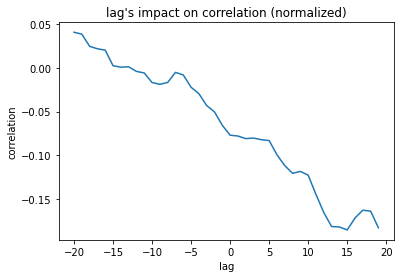

In [ ]:
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i) for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("lag's impact on correlation (normalized)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()